In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Generating random blobs
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


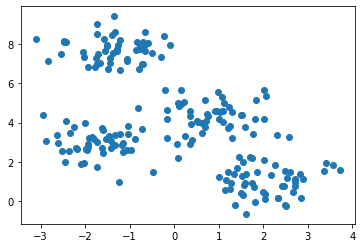

In [3]:
plt.scatter(X[:,0],X[:,1]);

In [4]:
# number of clusters 4 as a hyperparameter
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(X)
print(model.cluster_centers_)

[[-1.70639178  2.9104771 ]
 [ 0.86008475  4.31501411]
 [-1.36512238  7.70188306]
 [ 2.07464749  0.9869902 ]]


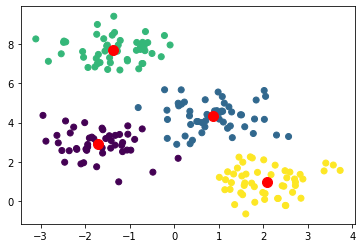

In [5]:
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red");

In [6]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.0


In [7]:
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [8]:
permutation = find_permutation(4, y, model.labels_)
print(permutation)

[2, 0, 3, 1]


In [9]:
new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.99


In [10]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)

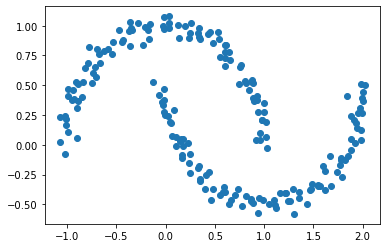

In [11]:
plt.scatter(X[:,0], X[:,1]);

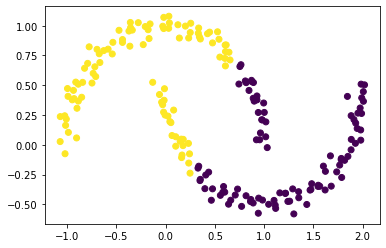

In [12]:
model=KMeans(2)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

Not good! How can we improve? 

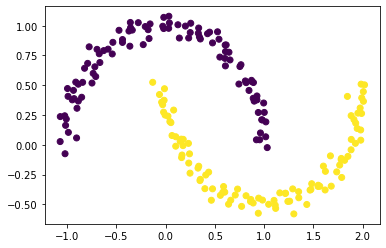

In [13]:
# Using DBSCAN algorithm!
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

The DBSCAN algorithm is based on densities. It does not require the 
user to specify the number of clusters. But now the algorithm depends 
on another hyperparameter: a threshold for distance (here 0.3)

In [14]:
# Downloading a set of images of handwritten digits with the correct labels 0,1,…,9. 
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

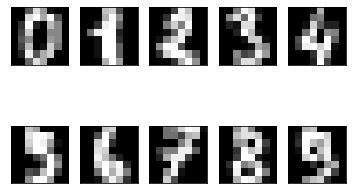

In [15]:
# Plotting the first 10
fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, digits.data[:10]):
    ax.imshow(digit.reshape(8,8), cmap="gray")

The images have quite a low resolution: 8*8=64 pixels.

In [16]:
# Clustering
model=KMeans(n_clusters = 10, random_state=0)
model.fit(digits.data)
model.cluster_centers_.shape

(10, 64)

In [17]:
# Accuracy
permutation = find_permutation(10, digits.target, model.labels_)
print(permutation)
acc = accuracy_score(digits.target, [ permutation[label] for label in model.labels_])
print("Accuracy score is", acc)

[4, 3, 5, 9, 7, 0, 1, 8, 2, 6]
Accuracy score is 0.7935447968836951


Quite a good result with a simple algorithm!

In [22]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [23]:
# Wrong? Why?

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.9348914858096828

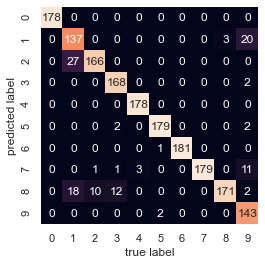

In [24]:
# confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

['setosa' 'versicolor' 'virginica']


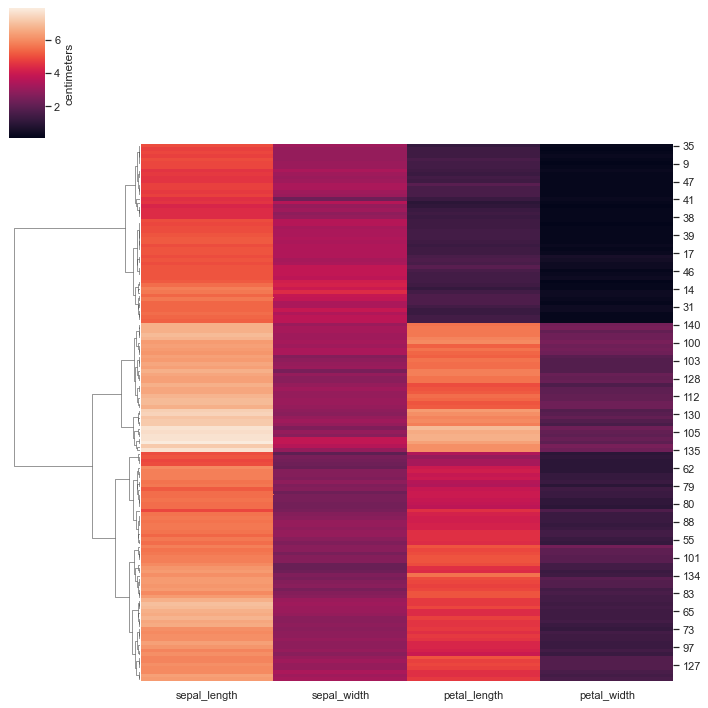

In [18]:
# Creating heatmap and dendrogram.

import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column
print(species.unique())         # The samples seems to be from these three species
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'}); # Cluster only the rows

In [26]:
"""t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process 
the data before performing k-means"""
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
# data
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = model(digits.target[mask])[0]

# accuracy
accuracy_score(digits.target, labels)

TypeError: 'KMeans' object is not callable